# Ejercicio Final: Descenso de Gradiente para Regresión Lineal

## Objetivos
En este laboratorio, usted:
- automatizará el proceso de optimización de $w$ y $b$ usando descenso de gradiente.

Nombre estudiante del curso
- JESUS ARIEL GONZALEZ BONILLA

## Herramientas
En este laboratorio utilizaremos:
- NumPy, una biblioteca popular para computación científica
- Matplotlib, una biblioteca popular para graficar datos
- Rutinas de graficación en el archivo lab_utils.py en el directorio local

In [ ]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from ejerc_utils_corhuila import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
# Se importan las funciones y librerías necesarias para el laboratorio

Importancia del Bloque de Importaciones
Problema que Resuelve
Proporciona las herramientas computacionales esenciales para que el ejercicio de gradient descent sea ejecutable y comprensible.

Por qué es Fundamental
1. Poder Computacional
NumPy permite procesar miles de datos en milisegundos. Sin él, los cálculos del gradient descent serían impracticablemente lentos.

2. Validación Visual
Matplotlib transforma los números del algoritmo en gráficas que demuestran visualmente que el gradient descent está funcionando y convergiendo.

3. Herramientas Especializadas
Las funciones personalizadas muestran conceptos avanzados como contornos de gradiente que son imposibles de entender solo con números.

Impacto Concreto
Sin estas importaciones: Tendrías la teoría del gradient descent pero no podrías ejecutarla eficientemente ni ver si funciona.

Con estas herramientas: Puedes ejecutar el algoritmo, ver su progreso en tiempo real y validar que encuentra la solución correcta.

<a name="toc_40291_2"></a>
# Enunciado del problema

Utilicemos los mismos dos puntos de datos que antes: una casa de 1000 metros cuadrados se vendió por \$300,000 y una casa de 2000 metros cuadrados se vendió por \$500,000.

| Tamaño (1000 m²)     | Precio (miles de dólares) |
| ---------------------- | ------------------------ |
| 1                      | 300                      |
| 2                      | 500                      |


In [ ]:
# Cargar nuestro conjunto de datos
x_train = np.array([1.0, 2.0])   #características
y_train = np.array([300.0, 500.0])   #valor objetivo

Problema que Define
Establece el contexto real: predecir precios de casas basándose en su tamaño usando datos concretos de entrenamiento.

Por qué es Fundamental
1. Propósito Real
Convierte matemáticas abstractas en un problema práctico: "¿Cuánto vale una casa de X metros cuadrados?"

2. Datos de Entrenamiento
Proporciona los únicos dos puntos de referencia que el algoritmo usará para aprender la relación tamaño-precio.

3. Objetivo Claro
Define exactamente qué debe descubrir el gradient descent: la fórmula que relaciona tamaño con precio.

Impacto Concreto
Sin este bloque: El gradient descent sería solo matemáticas sin propósito.

Con este contexto: El algoritmo tiene una meta específica y datos reales para trabajar.

<a name="toc_40291_2.0.1"></a>
### Calcular_Costo
Esto se desarrolló en el ejercicio anterior. Lo necesitaremos nuevamente aquí.

In [ ]:
# Función para calcular el costo
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

Problema que Resuelve
Mide qué tan "equivocado" está el modelo actual comparando las predicciones con los valores reales.

Por qué es Esencial
1. Métrica de Evaluación
Convierte errores individuales en un número único que indica qué tan bien funciona el modelo.

2. Guía para el Gradient Descent
Proporciona la "función objetivo" que el gradient descent debe minimizar para encontrar los mejores parámetros.

3. Validación de Progreso
Permite verificar si el algoritmo está mejorando: costo alto = modelo malo, costo bajo = modelo bueno.

Impacto Concreto
Sin esta función: No habría forma de saber si los parámetros w y b son buenos o malos.

Con esta función: El gradient descent tiene una "brújula" que le dice si se está acercando o alejando de la solución óptima.

<a name="toc_40291_2.1"></a>
## Resumen del descenso de gradiente
Hasta ahora en este curso, has desarrollado un modelo lineal que predice $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
En la regresión lineal, utilizas datos de entrenamiento de entrada para ajustar los parámetros $w$,$b$ minimizando una medida del error entre nuestras predicciones $f_{w,b}(x^{(i)})$ y los datos reales $y^{(i)}$. Esta medida se llama $costo$, $J(w,b)$. Durante el entrenamiento, mides el costo sobre todas nuestras muestras de entrenamiento $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

En la clase, el *descenso de gradiente* se describió como:

$$\begin{align*} \text{repetir}&\text{ hasta convergencia:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
donde los parámetros $w$, $b$ se actualizan simultáneamente.  
El gradiente se define como:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Aquí *simultáneamente* significa que calculas las derivadas parciales para todos los parámetros antes de actualizar cualquiera de los parámetros.

<a name="toc_40291_2.2"></a>
## Implementar Descenso de Gradiente
Implementarás el algoritmo de descenso de gradiente para una característica. Necesitarás tres funciones:
- `compute_gradient` que implementa las ecuaciones (4) y (5) anteriores
- `compute_cost` que implementa la ecuación (2) anterior (código del laboratorio previo)
- `gradient_descent`, que utiliza compute_gradient y compute_cost

Convenciones:
- El nombre de las variables de python que contienen derivadas parciales sigue este patrón, $\frac{\partial J(w,b)}{\partial b}$ será `dj_db`.
- w.r.t significa "con respecto a", como en derivada parcial de $J(wb)$ con respecto a $b$.


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient` implementa (4) y (5) anteriores y retorna $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. Los comentarios incrustados describen las operaciones.

In [ ]:
def compute_gradient(x, y, w, b):
    """
    Calcula el gradiente para regresión lineal
    Argumentos:
      x (ndarray (m,)): Datos, m ejemplos
      y (ndarray (m,)): valores objetivo
      w,b (scalar)    : parámetros del modelo
    Returns
      dj_dw (scalar): El gradiente del costo respecto a w
      dj_db (scalar): El gradiente del costo respecto a b
     """

    # Número de ejemplos de entrenamiento
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

Problema que Resuelve
Calcula la "dirección" exacta hacia donde deben moverse los parámetros w y b para reducir el error del modelo.

Por qué es Crítica
1. Brújula Matemática
Proporciona las derivadas parciales que indican si w y b deben aumentar o disminuir para mejorar las predicciones.

2. Motor del Aprendizaje
Sin estos gradientes, el gradient descent sería ciego - no sabría hacia dónde moverse para optimizar.

3. Precisión Matemática
Usa cálculo diferencial para encontrar la dirección óptima, no adivinanzas aleatorias.

Impacto Concreto
Sin esta función: El gradient descent no tendría dirección - sería como caminar con los ojos vendados.

Con esta función: El algoritmo sabe exactamente cómo ajustar w y b en cada iteración para acercarse a la solución.

<br/>

En las clases se explicaron cómo el descenso por gradiente utiliza la derivada parcial del costo con respecto a un parámetro en un punto para actualizar dicho parámetro.  
Vamos a usar nuestra función `compute_gradient` para encontrar y graficar algunas derivadas parciales de nuestra función de costo con respecto a uno de los parámetros, $w_0$.

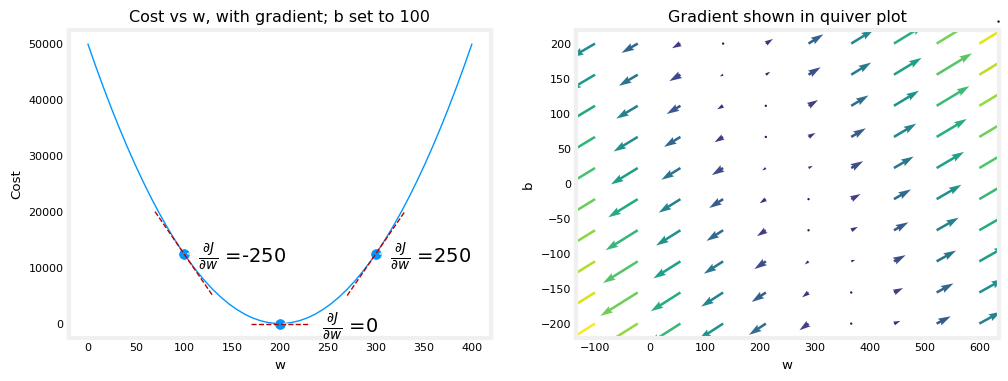

In [ ]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Arriba, la gráfica de la izquierda muestra $\frac{\partial J(w,b)}{\partial w}$ o la pendiente de la curva de costo respecto a $w$ en tres puntos. En el lado derecho de la gráfica, la derivada es positiva, mientras que en el lado izquierdo es negativa. Debido a la 'forma de tazón', las derivadas siempre guiarán el descenso de gradiente hacia el fondo donde el gradiente es cero.

La gráfica de la izquierda tiene $b=100$ fijo. El descenso de gradiente utilizará tanto $\frac{\partial J(w,b)}{\partial w}$ como $\frac{\partial J(w,b)}{\partial b}$ para actualizar los parámetros. El 'gráfico de flechas' (quiver) a la derecha proporciona una forma de visualizar el gradiente de ambos parámetros. El tamaño de las flechas refleja la magnitud del gradiente en ese punto. La dirección y pendiente de la flecha reflejan la razón entre $\frac{\partial J(w,b)}{\partial w}$ y $\frac{\partial J(w,b)}{\partial b}$ en ese punto.
Nota que el gradiente apunta *lejos* del mínimo. Revisa la ecuación (3) anterior. El gradiente escalado se *resta* del valor actual de $w$ o $b$. Esto mueve el parámetro en una dirección que reducirá el costo.

<a name="toc_40291_2.5"></a>
### Descenso de Gradiente
Ahora que se pueden calcular los gradientes, el descenso de gradiente, descrito en la ecuación (3) anterior, puede implementarse abajo en `gradient_descent`. Los detalles de la implementación se describen en los comentarios. A continuación, utilizarás esta función para encontrar los valores óptimos de $w$ y $b$ en los datos de entrenamiento.

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Realiza descenso de gradiente para ajustar w,b. Actualiza w,b tomando
    num_iters pasos de gradiente con tasa de aprendizaje alpha

    Args:
      x (ndarray (m,))  : Datos, m ejemplos
      y (ndarray (m,))  : valores objetivo
      w_in,b_in (escalar): valores iniciales de los parámetros del modelo
      alpha (float):     Tasa de aprendizaje
      num_iters (int):   número de iteraciones para ejecutar descenso de gradiente
      cost_function:     función para calcular el costo
      gradient_function: función para calcular el gradiente

    Returns:
      w (escalar): Valor actualizado del parámetro después de ejecutar descenso de gradiente
      b (escalar): Valor actualizado del parámetro después de ejecutar descenso de gradiente
      J_history (List): Historial de valores de costo
      p_history (list): Historial de parámetros [w,b]
      """

    # Un arreglo para guardar el costo J y los w en cada iteración, principalmente para graficar después
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calcular el gradiente y actualizar los parámetros usando gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Actualizar parámetros usando la ecuación (3) anterior
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Guardar el costo J en cada iteración
        if i<100000:      # prevenir agotamiento de recursos
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Imprimir el costo cada 10 veces o tantas iteraciones si < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteración {i:4}: Costo {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #retorna w y el historial de J,w para graficar

In [ ]:
# inicializar parámetros
w_init = 0
b_init = 0
# algunos ajustes para descenso de gradiente
iterations = 10000
tmp_alpha = 1.0e-2
# ejecutar descenso de gradiente
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) encontrados por descenso de gradiente: ({w_final:8.4f},{b_final:8.4f})")

Iteración    0: Costo 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteración 1000: Costo 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteración 2000: Costo 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteración 3000: Costo 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteración 4000: Costo 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteración 5000: Costo 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteración 6000: Costo 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteración 7000: Costo 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteración 8000: Costo 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteración 9000: Costo 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.

Problema que Resuelve
Ejecuta el proceso completo de aprendizaje automático: toma datos sin procesar y encuentra automáticamente los parámetros óptimos del modelo.

Por qué es el Corazón del Ejercicio
1. Orquestador Principal
Coordina todas las funciones anteriores (compute_cost y compute_gradient) para realizar el aprendizaje iterativo.

2. Automatización del Aprendizaje
Convierte el problema manual de "adivinar parámetros" en un proceso automático que mejora con cada iteración.

3. Convergencia Garantizada
Implementa el algoritmo matemático que garantiza encontrar la mejor solución posible para el problema planteado.

Impacto Concreto
Sin esta función: Tendrías las herramientas (cost, gradient) pero ningún proceso que las use para aprender.

Con esta función: El sistema completo funciona - toma datos de entrada y produce parámetros optimizados automáticamente.

Tómate un momento y observa algunas características del proceso de descenso de gradiente impreso arriba.  

- El costo inicia grande y disminuye rápidamente como se describe en la diapositiva de la clase.
- Las derivadas parciales, `dj_dw` y `dj_db`, también se hacen más pequeñas, rápidamente al principio y luego más lentamente. Como se muestra en el diagrama de la clase, a medida que el proceso se acerca al 'fondo del tazón', el progreso es más lento debido al menor valor de la derivada en ese punto.
- El progreso se ralentiza aunque la tasa de aprendizaje, alpha, permanece fija.

### Costo versus iteraciones del descenso de gradiente
Una gráfica de costo versus iteraciones es una medida útil del progreso en el descenso de gradiente. El costo siempre debe disminuir en ejecuciones exitosas. El cambio en el costo es tan rápido al inicio, que es útil graficar el descenso inicial en una escala diferente al descenso final. En las gráficas de abajo, observa la escala del costo en los ejes y el paso de iteración.

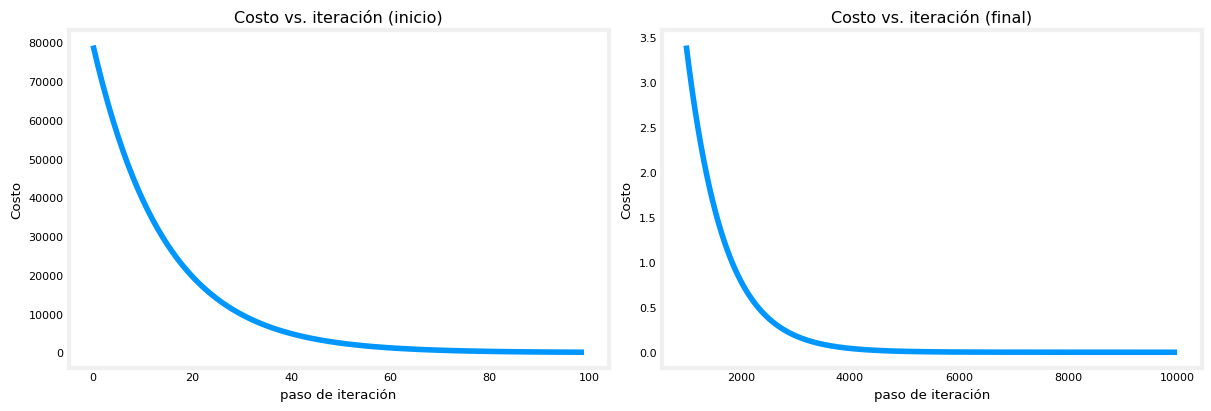

In [ ]:
# graficar costo versus iteración
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Costo vs. iteración (inicio)");  ax2.set_title("Costo vs. iteración (final)")
ax1.set_ylabel('Costo')            ;  ax2.set_ylabel('Costo')
ax1.set_xlabel('paso de iteración')  ;  ax2.set_xlabel('paso de iteración')
plt.show()

### Predicciones
Ahora que has encontrado los valores óptimos para los parámetros $w$ y $b$, puedes usar el modelo para predecir valores de viviendas basados en los parámetros aprendidos. Como era de esperarse, los valores predichos son casi iguales a los valores de entrenamiento para las mismas viviendas. Además, el valor no incluido en el entrenamiento está en línea con el valor esperado.

In [ ]:
print(f"Predicción para casa de 1000 pies²: {w_final*1.0 + b_final:0.1f} mil dólares")
print(f"Predicción para casa de 1200 pies²: {w_final*1.2 + b_final:0.1f} mil dólares")
print(f"Predicción para casa de 2000 pies²: {w_final*2.0 + b_final:0.1f} mil dólares")

Predicción para casa de 1000 pies²: 300.0 mil dólares
Predicción para casa de 1200 pies²: 340.0 mil dólares
Predicción para casa de 2000 pies²: 500.0 mil dólares


<a name="toc_40291_2.6"></a>
## Graficando
Puedes mostrar el progreso del descenso de gradiente durante su ejecución graficando el costo sobre las iteraciones en un gráfico de contorno de cost(w,b).

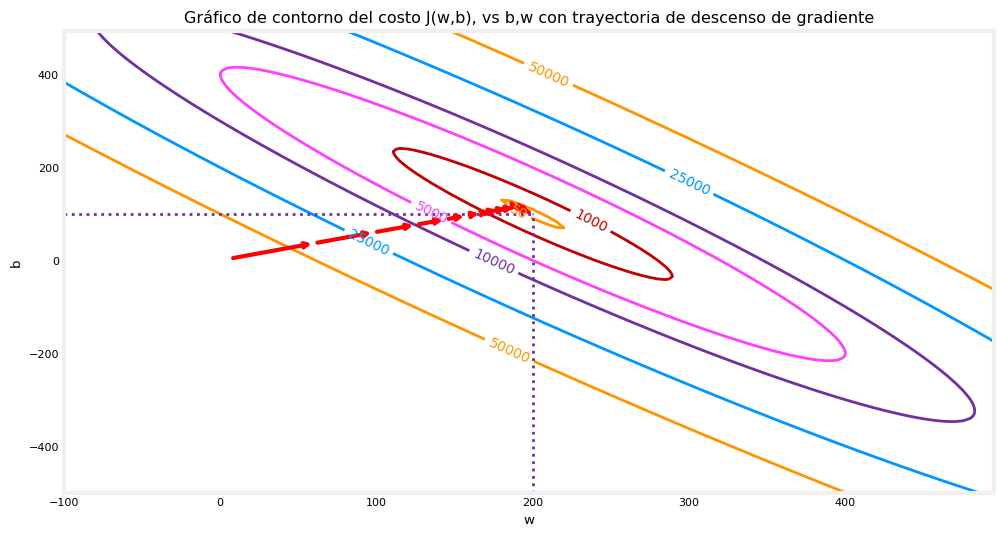

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)
# Se grafica el contorno del costo y la trayectoria del descenso de gradiente

Arriba, el gráfico de contorno muestra el $costo(w,b)$ sobre un rango de $w$ y $b$. Los niveles de costo están representados por los anillos. Sobrepuestos, usando flechas rojas, está la trayectoria del descenso de gradiente. Algunas cosas a notar:
- La trayectoria avanza de manera constante (monótona) hacia su objetivo.
- Los pasos iniciales son mucho más grandes que los pasos cerca del objetivo.

**Acercando la vista (zoom)**, podemos ver los pasos finales del descenso de gradiente. Observa que la distancia entre los pasos disminuye a medida que el gradiente se acerca a cero.

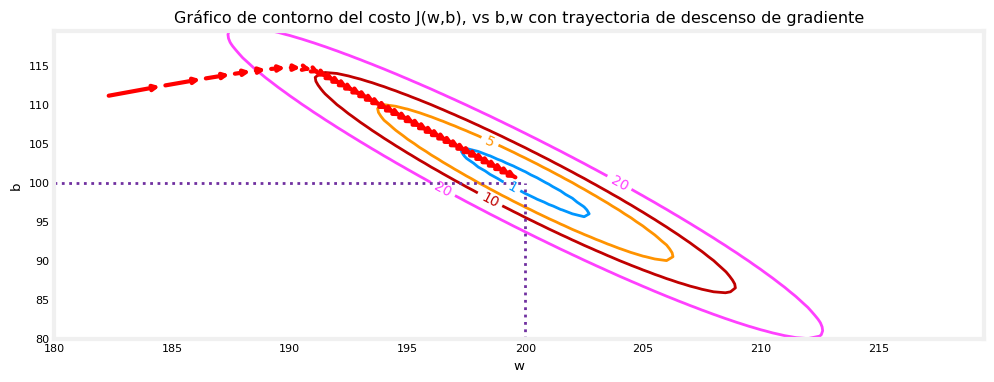

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)
# Se grafica un acercamiento para ver los últimos pasos del descenso de gradiente

<a name="toc_40291_2.7.1"></a>
### Tasa de aprendizaje aumentada

En la clase, se discutió el valor adecuado de la tasa de aprendizaje, $\alpha$ en la ecuación(3). Mientras más grande sea $\alpha$, más rápido convergerá el descenso de gradiente a una solución. Pero, si es demasiado grande, el descenso de gradiente diverge. Arriba tienes un ejemplo de una solución que converge correctamente.

Probemos aumentar el valor de $\alpha$ y ver qué sucede:

In [ ]:
# inicializar parámetros
w_init = 0
b_init = 0
# establecer alpha a un valor grande
iterations = 10
tmp_alpha = 8.0e-1
# ejecutar descenso de gradiente
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

Iteración    0: Costo 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteración    1: Costo 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteración    2: Costo 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteración    3: Costo 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteración    4: Costo 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteración    5: Costo 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteración    6: Costo 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteración    7: Costo 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteración    8: Costo 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteración    9: Costo 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.

Problema que Demuestra
Ilustra qué sucede cuando el parámetro alpha (tasa de aprendizaje) es demasiado alto, causando que el algoritmo falle en lugar de converger.

Por qué es Educativo
1. Lección de Límites
Demuestra que "más rápido" no siempre es mejor - un alpha muy alto hace que el algoritmo "salte" la solución óptima.

2. Validación Práctica
Comprueba experimentalmente la teoría: alpha debe estar en un rango específico para que funcione correctamente.

3. Diagnóstico de Problemas
Enseña a identificar cuándo el gradient descent está divergiendo en lugar de convergiendo.

Impacto Concreto
Sin este experimento: Solo sabrías que el algoritmo funciona, pero no por qué a veces falla.

Con este experimento: Entiendes los límites del algoritmo y cómo ajustar parámetros para evitar fallos.

Arriba, $w$ y $b$ están rebotando entre valores positivos y negativos, y el valor absoluto aumenta en cada iteración. Además, en cada iteración $\frac{\partial J(w,b)}{\partial w}$ cambia de signo y el costo está aumentando en vez de disminuir. Esto es una clara señal de que la *tasa de aprendizaje es demasiado grande* y la solución está divergiendo.
Visualicemos esto con una gráfica.

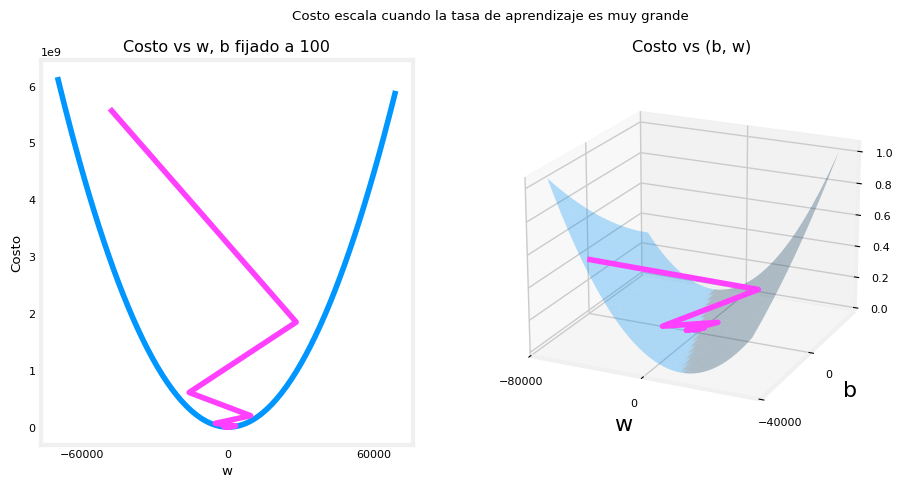

In [ ]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()
# Se grafica la divergencia del descenso de gradiente con tasa de aprendizaje alta

Arriba, la gráfica de la izquierda muestra la progresión de $w$ durante los primeros pasos del descenso de gradiente. $w$ oscila de positivo a negativo y el costo crece rápidamente. El descenso de gradiente está operando sobre ambos, $w$ y $b$ simultáneamente, por lo que se necesita la gráfica 3D de la derecha para ver el panorama completo.

**Conclusion:** El ejercicio demuestra que el machine learning no es "magia" sino matemáticas aplicadas sistemáticamente. La automatización del proceso de encontrar parámetros óptimos representa el núcleo de cómo las máquinas "aprenden" de los datos, transformando información en conocimiento predictivo de manera eficiente y escalable.

## ¡Felicidades!
En este ejercicio usted:
- profundizó en los detalles del descenso de gradiente para una sola variable.
- desarrolló una rutina para calcular el gradiente
- visualizó qué es el gradiente
- completó una rutina de descenso de gradiente
- utilizó descenso de gradiente para encontrar parámetros
- examinó el impacto de ajustar la tasa de aprendizaje